In [1]:
import pandas as pd
import dvc.api as DvcApi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys, os

#sys.path.append(os.path.abspath(os.path.join("../..")))
#sys.path.append(os.path.abspath(os.path.join("../scripts")))

# EDA of CRYPTO20 Data

In this notebook we will examine price data of CRYPTO20 (C20), the first cryptocurrency tokenized index fund, its holdings consists of top twenty cryptocurrencies by market capitalization [source](https://www.coinbase.com/price/c20)

The data spans the period of Oct 2018 - Oct 2022.

## Import the data

In [3]:
path = "data/C20-USD.csv"
repo = "../"
version = "eo-v1"
remote = "eo-remote"

data_url = DvcApi.get_url(path = path, repo = repo, rev = version,remote= remote) 
data = pd.read_csv(data_url)

In [4]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-10,0.725548,0.729690,0.708040,0.712510,0.712510,31873
1,2018-10-11,0.711248,0.711248,0.619986,0.622455,0.622455,55278
2,2018-10-12,0.618801,0.672244,0.617217,0.644308,0.644308,31363


## General Description of the data

In [5]:
print("the data has {} rows and {} columns".format(data.shape[0], data.shape[1]))

the data has 1462 rows and 7 columns


In [6]:
# statistical summary of the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,1.444363,1.537249,1.365511,1.443887,1.443887,38945.459644
std,1.625964,1.981061,1.551719,1.626336,1.626336,73578.091689
min,0.000000,0.003782,0.000000,0.000000,0.000000,1.000000
25%,0.405283,0.420700,0.389150,0.405052,0.405052,1558.750000
50%,0.610245,0.638700,0.566454,0.609630,0.609630,8304.500000
75%,2.819606,2.930616,2.556317,2.817364,2.817364,40731.500000
max,6.349537,40.698662,5.873050,6.341028,6.341028,614381.000000


In [7]:
# missing data
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no missing data.

In [8]:
start_date = data['Date'].min()
end_date =  data['Date'].max()

print("data is collect for the period from {} to {}".format(start_date, end_date))

data is collect for the period from 2018-10-10 to 2022-10-10


In [9]:
# note that for crypto, there is trading everyday .. unlike regular stock market

total_days = 1 + (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days

print("In the period of {}, crypto trading was open in {} days.".format(total_days, data['Date'].nunique()))

In the period of 1462, crypto trading was open in 1462 days.


In [10]:
# change the date column type to datetime
data['Date'] = pd.to_datetime(data['Date'])

data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Univariate Analysis

We will plot OHLC (open-high-low-close) prices over time.

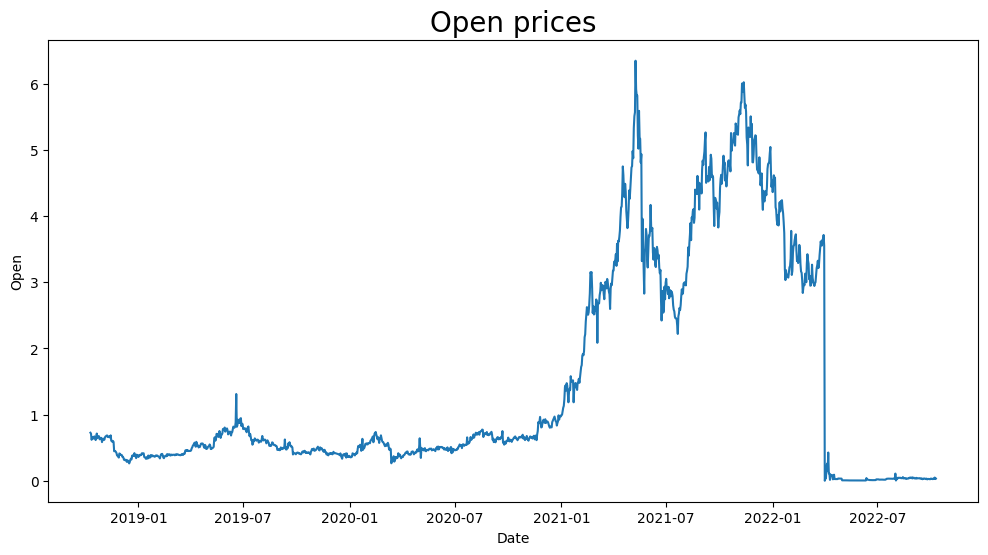

In [20]:
_, ax = plt.subplots(1, figsize=(12, 6))
sns.lineplot(ax= ax, x= data.Date, y = data.Open)
plt.title('Open prices', size=20)
plt.show()

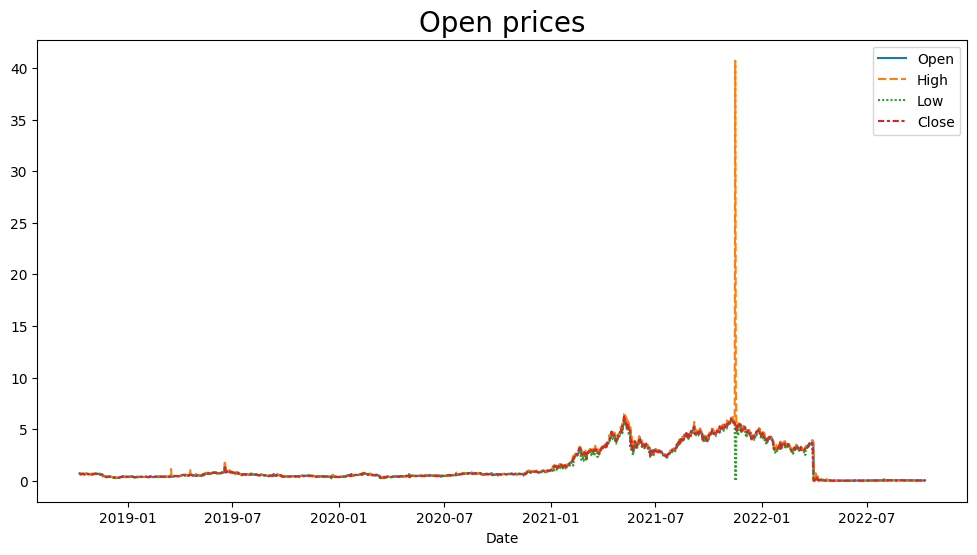

In [24]:
df = data[['Date','Open', 'High', 'Low', 'Close']].set_index("Date")
_, ax = plt.subplots(1, figsize=(12, 6))
sns.lineplot(data= df)
plt.title('OHLC prices', size=20)
plt.show()

There seem to be high fluctuations especially in the period of the end of 2021. Lets look at it

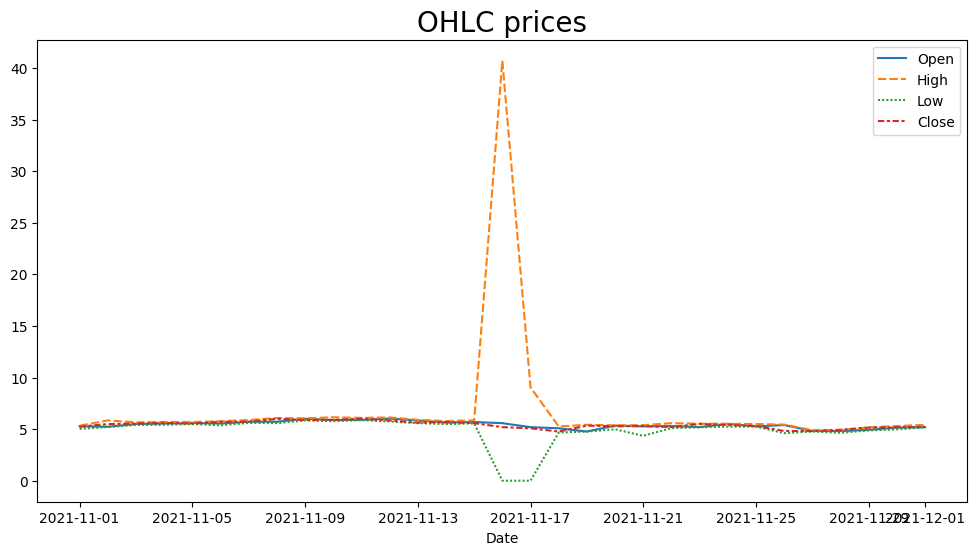

In [27]:
df1 = df['2021-11-1':'2021-12-1']

_, ax = plt.subplots(1, figsize=(12, 6))
sns.lineplot(data= df1)
plt.title('OHLC prices', size=20)
plt.show()

Something happened around mid November 2021, the high and low prices have a great diparity.

In general, fluctuations are a mark of cryptocurrencies, compared to usual stocks or stable crypto currencies. 